In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Vamos começar com a caminho aleatório 1D


# Sempre definam a semente para conseguir reproduzir os resultados
np.random.seed(42)

# Passeio aleatório em 1D

In [2]:
# Vamos começar o passeio aleatório na origem
x = 0

# Definimos o número de passos que queremos analisar
N = 100

# Aqui, o passo é definido como um passo à direita ou à esquerda
# A PROBABILIDADE DE DAR UM PASSO À DIREITA É IGUAL À DE DAR UM PASSO PARA A ESQUERDA!

# Passo à direita  x += 1
# Passo à esquerda x -= 1

# Loop para "dar N passos"
for i in np.arange(N):
    r = np.random.rand()         # Gera um número aleatório no intervalo [0,1)

    # Passo à direita
    if r < 0.5:
        x += 1
    # Passo à esquerda
    else:
        x -= 1

# Vamos ver onde o "caminhador" terminou
print(x)

6


In [3]:
# Se fizermos o caminho várias vezes, podemos salvar a posição
# final em cada passeio. Faremos isso em um array
x_final = np.array([])

# Vamos definir diferentes passeios

# Definimos quantos passeios vamos fazer
N_passeios = 1000

# NOTEM: para cada um dos N_passeios, daremos N passos

# Já percebam que precisaremos de dois loops:
### Um para dar N passos
### Outro para fazer N_passeios

# Primeiro loop
for i in np.arange(N_passeios):
    # np.random.seed(i)
    x = 0
    # Loop para cada passeio
    for i in np.arange(N):
        r = np.random.rand()            # Gera um número aleatório no intervalo [0,1)

        # Passo à direita
        if r < 0.5:
            x += 1
        # Passo à esquerda
        else:
            x-= 1

    # Salvar o x final na lista x_final
    x_final = np.append(x_final, x)

# Mostrar o valor médio da posição final
print("="*20)
print(x_final.mean())
print("="*20)

-0.136


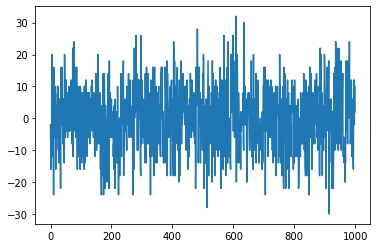

In [4]:
# Plotar as posições finais
plt.plot(x_final)
plt.show()

## Vamos ver um pouco de estatística

![walk](https://www.mit.edu/~kardar/teaching/projects/chemotaxis(AndreaSchmidt)/numberline_hops.gif)

Seja $d$ a distância percorrida. Sabemos $d = a_1 + a_2 + a_3 + ... + a_N$.

Seja, $<d>$ a média de $d$ repetindo o passeio várias vezes:

$<d> = <a_1 + a_2 + a_3 + ... + a_N> = <a_1> + <a_2> + <a_3> + ... + <a_N> = 0$

Esperado!!

Vamos calcular a média de $d^2$:

$<d^2> = <(a_1 + a_2 + a_3 + ... + a_N)^2>$

$<d^2> = (<a_1^2> + <a_2^2> + <a_3^2> + ... + <a_N^2>) + 2(<a_1a_2> + <a_1a_3> + ... + <a_1a_N> + <a_2a_N> + ...)$

O termo $<a_i^2>$ é igual a 1, já que os valores possíveis são $1$ ou $-1$.

Os termos cruzados $<a_i a_j>$ podem assumir valores $1$ ou $-1$ também, sendo os possíveis pares $(1,1), (1,-1), (-1,1), (-1,-1)$. Notem que há dois pares que se multiplicam a $1$ e dois, a $-1$. Logo, esperamos que a média desses termos seja nula. Logo,

$<d^2> = (1 + 1 + 1 + ... + 1) + 2(0 + 0 + ... + 0 + 0 + ...) = N$.

Legal! Em média, o quadrado da distânica percorrida pelo "passeio" é o número de passos. Calculando a raiz desse termo, podemos pensar na distância média percorrida após $N$ passos (**raiz quadrática média**).

In [18]:
# CALCULAR MÉDIA E DESVIO PADRÃO APÓS N PASSOS. Ver [aqui](https://www.mit.edu/~kardar/teaching/projects/chemotaxis(AndreaSchmidt)/random.htm)

# Cool extras [here](http://astro.pas.rochester.edu/~aquillen/phy256/ps7.html)

# Wolfram [here](https://mathworld.wolfram.com/RandomWalk1-Dimensional.html)

## Distribuição

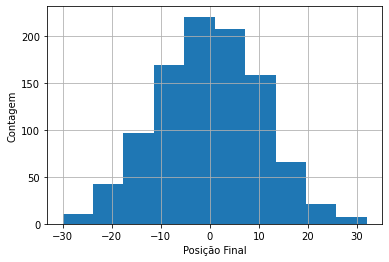

In [5]:
# Histograma para ver a distribuição das posições finais
plt.hist(x_final)
plt.xlabel("Posição Final")
plt.ylabel("Contagem")
plt.grid()
plt.show()

## Deixar o código "funcional"

Vamos definir as funções que usaremos

In [25]:
# Podemos deixar tudo isso bem mais limpo.
# O Loop interno (de dar N passos), por exemplo, pode ser transformado em função:

# Definir função para dar N passos:
def passos(N):
    '''
    Função que retorna a posição de um passeio aleatório
    1D após N passos iniciado na origem.
    '''
    x = 0
    for i in np.arange(N):
        r = np.random.rand()

        # Passo à direita
        if r < 0.5:
            x += 1
        # Passo à esquerda
        else:
            x -= 1
    return x

# Definir função para plotar distribuição final
def plot_hist(x):
    plt.hist(x_final, color='g', alpha=0.5, ec='k')
    plt.xlabel("Posição Final")
    plt.ylabel("Contagem")

    plt.axvline(x.mean(), color='r', linestyle='dashed', linewidth=4)

    plt.show()

# Função para plotar posição final de cada passeio na linha
def plot_linha(x, N_passeios):
    plt.scatter(x, np.ones(int(N_passeios)), s = 0.5)
    plt.xlabel("Posição")
    plt.show()

In [26]:
# Fixar a semente
np.random.seed(42)
# Número de passos em cada passeio
N = 1e3
# Número de passeios
N_passeios = 1e3

# Inicializa array com as posições finais
x_final = np.array([])

# Primeiro loop
for i in np.arange(N_passeios):

    # Salvar o x final na lista x_final
    x_final = np.append(x_final, passos(N))

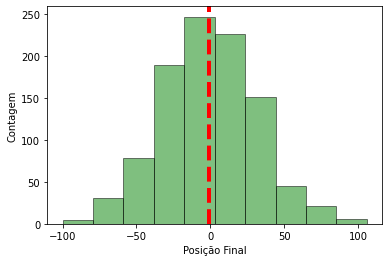

In [27]:
plot_hist(x_final)

In [9]:
# Gaussiana de média zero
def gauss(x, d):
    return ( 1 / (d*np.sqrt(2*np.pi)) ) * np.exp(-0.5*(x**2/d**2))


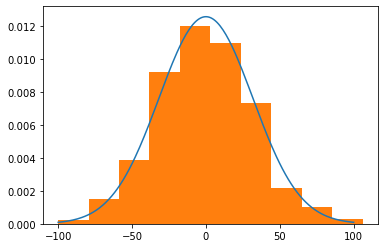

In [10]:
xx = np.linspace(-100,100,200)

plt.plot(xx, gauss(xx, x_final.std()))
plt.hist(x_final, density=True)
plt.show()

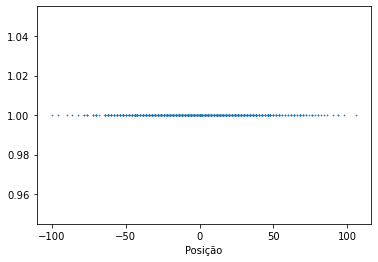

In [11]:
plot_linha(x_final, N_passeios)

In [12]:
# notem:
print(x_final.std())
print(np.sqrt(N))

31.79771759104732
31.622776601683793


# Passeio aleatório em 2D

In [13]:
####################################
# Passeio aleatório 2D
####################################

# Agora o passeio é feito em um plano
# Cada passo tem tamanho 1 (módulo 1)
# Cada passo pode ser em qualquer direção.

![img](https://4.bp.blogspot.com/-KTzOYHGnqj8/V3TzIrbpuSI/AAAAAAAAINo/Ae5AYImrdZotIcqjk-LG2-Wid3QNokv8ACLcB/s1600/Sistema%2Bde%2Bcoordenadas%2Bpolares.png)

In [14]:
def passos_2D(N, plota = False):
    # Comecemos da origem (agora precisamos de um vetor posição 2D)
    X = 0.0
    Y = 0.0

    if plota:
        # Definir vetor com histórico das posições
        x_passeio = np.array([X])
        y_passeio = np.array([Y])

    for i in np.arange(N):
        ang = np.random.rand()*2*np.pi
        X += np.cos(ang)
        Y += np.sin(ang)

        if plota:

            x_passeio = np.append(x_passeio, X)
            y_passeio = np.append(y_passeio, Y)

    if plota:
        plt.plot(x_passeio, y_passeio, lw=0.3, color='r')
        plt.show()

    return X, Y

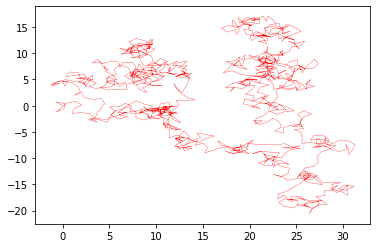

In [15]:
np.random.seed(42)

# Definir número de passos
N = 1000

# Visualizando um único passeio
X, Y = passos_2D(N, plota=True)

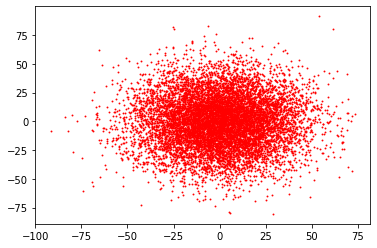

CPU times: user 22.6 s, sys: 3.27 ms, total: 22.6 s
Wall time: 22.6 s


In [16]:
%%time
# Definir quantos passeios vamos fazer:
N_passeios = 10000

X_final = np.array([])
Y_final = np.array([])

# Loop para diferentes passeios
for i in np.arange(N_passeios):
    X, Y = passos_2D(N)
    X_final = np.append(X_final, X)
    Y_final = np.append(Y_final, Y)

plt.scatter(X_final, Y_final, s = 0.8, c = 'r')
plt.show()

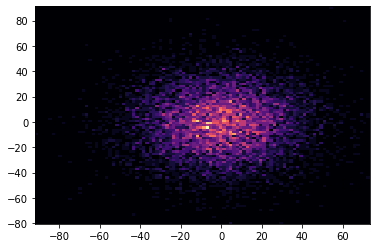

In [17]:
# Hisograma em 2D
plt.hist2d(X_final, Y_final, bins=100, cmap='magma')
plt.show()

## Desafios:

Plotar histograma 1D com as posições finais em x e em y, separadamente.
Verificar se "bate" com uma gaussiana.

**Otimizar o código!**